<a href="https://colab.research.google.com/github/eduardocs2001/Agenda_python_e_SQLite3/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/dataframe.csv', index_col = 0)

In [ ]:
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3377,2010-12-20,67979.0,68196.0,67264.0,67264.0,67264.0,2352800.0
159,1998-05-18,10906.0,10908.0,10010.0,10205.0,10205.0,0.0
3495,2011-06-13,62701.0,62968.0,62022.0,62023.0,62023.0,1397200.0
784,2000-10-09,15946.0,15975.0,15617.0,15855.0,15855.0,0.0
2178,2006-02-27,NaN,NaN,NaN,NaN,NaN,NaN


#ordena em ordem cronologica 

In [ ]:
dados = dados.sort_values(by='Date')
dados.dropna(subset=['Close'], inplace= True)
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-10-07,12737.0,12737.0,12458.0,12481.0,12481.0,0.0
1,1997-10-08,12530.0,12530.0,12270.0,12433.0,12433.0,0.0
2,1997-10-09,12325.0,12725.0,12325.0,12684.0,12684.0,0.0
3,1997-10-10,12609.0,12778.0,12609.0,12737.0,12737.0,0.0
4,1997-10-13,12817.0,12817.0,12615.0,12698.0,12698.0,0.0


#Correlação

In [ ]:
correlacao = dados.corr()
correlacao

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999816,0.999712,0.999534,0.999534,0.078123
High,0.999816,1.000000,0.999724,0.999790,0.999790,0.078299
Low,0.999712,0.999724,1.000000,0.999836,0.999836,0.077933
Close,0.999534,0.999790,0.999836,1.000000,1.000000,0.078454
Adj Close,0.999534,0.999790,0.999836,1.000000,1.000000,0.078454
Volume,0.078123,0.078299,0.077933,0.078454,0.078454,1.000000


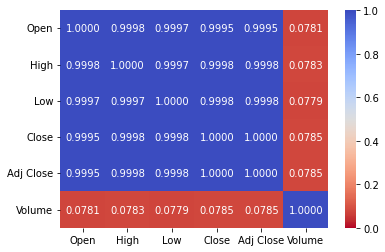

In [ ]:
sns.heatmap(correlacao , annot = True, vmin= 0, vmax= 1, cmap='coolwarm_r',fmt='.4f');

#Filtrando e tratando valores de fechamento

In [ ]:
close = dados[['Date','Close']]

In [ ]:
close.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
close['Close'] = close['Close'].astype(int)
close['Date'] = close['Date'].astype('datetime64[ms]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
close.dtypes

Date     datetime64[ns]
Close             int64
dtype: object

In [ ]:
close

,Date,Close
0,1997-10-07,12481
1,1997-10-08,12433
2,1997-10-09,12684
3,1997-10-10,12737
4,1997-10-13,12698
...,...,...
6151,2022-02-24,111592
6152,2022-02-25,113142
6153,2022-03-02,115174
6154,2022-03-03,115166


#Rede Neural

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

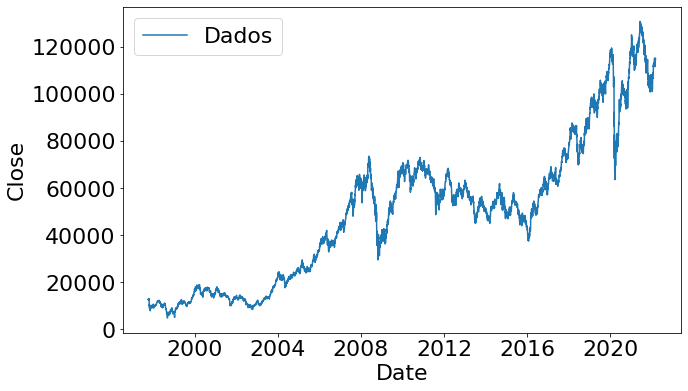

In [ ]:
sns.lineplot(x='Date', y='Close', data=close, label='Dados');


In [ ]:
from datetime import date
import time

In [ ]:
datas = list(close['Date'])
dados = []
for x in datas:
  dado = time.mktime(x.timetuple())   
  dados.append(int(dado))
close['Date'] = dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
datas = list(close['Date'])
print(datas)

[876182400, 876268800, 876355200, 876441600, 876700800, 876787200, 876873600, 876960000, 877046400, 877305600, 877392000, 877478400, 877564800, 877651200, 877910400, 877996800, 878083200, 878169600, 878256000, 878515200, 878601600, 878688000, 878774400, 878860800, 879120000, 879206400, 879292800, 879379200, 879465600, 879724800, 879811200, 879897600, 879984000, 880070400, 880329600, 880416000, 880502400, 880588800, 880675200, 880934400, 881020800, 881107200, 881193600, 881280000, 881539200, 881625600, 881712000, 881798400, 881884800, 882144000, 882230400, 882316800, 882403200, 882489600, 882748800, 882835200, 883094400, 883353600, 883440000, 883699200, 883958400, 884044800, 884131200, 884217600, 884304000, 884563200, 884649600, 884736000, 884822400, 884908800, 885168000, 885254400, 885340800, 885427200, 885513600, 885772800, 885859200, 885945600, 886032000, 886118400, 886377600, 886464000, 886550400, 886636800, 886723200, 886982400, 887068800, 887155200, 887241600, 887328000, 887587200

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(close)

StandardScaler()

In [ ]:
dados_escalado = sc.transform(close)

In [ ]:
x = dados_escalado[:,0]
y = dados_escalado[:,1]

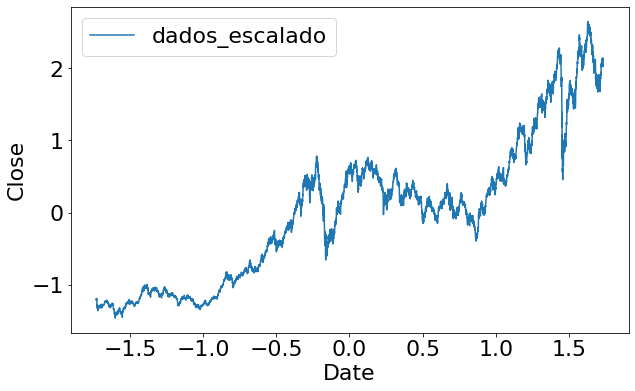

In [ ]:
sns.lineplot(x=x, y=y, label='dados_escalado');
mpl.pyplot.ylabel('Close');
mpl.pyplot.xlabel('Date');

In [ ]:
tamanho_treino = int(len(close)*0.8)
tamanho_teste = int(len(close)*0.2)



In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [ ]:
xteste = x[tamanho_treino:len(close)]
yteste = y[tamanho_treino:len(close)]

Em azul é apenas os dados de treino, no qual o código tera acesso, em laranja e dados para teste no qual o código não tera acesso

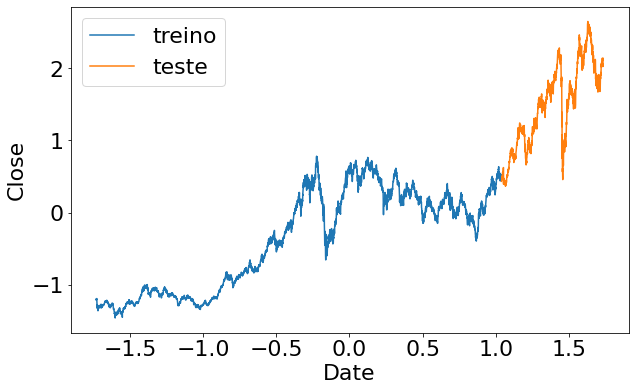

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino');
sns.lineplot(x=xteste, y=yteste, label='teste');
mpl.pyplot.ylabel('Close');
mpl.pyplot.xlabel('Date');

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', activation='linear',use_bias=False))

In [ ]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(xtreino,ytreino)

151/151 [==============================] - 1s 3ms/step - loss: 0.1544


In [ ]:
y_predict = regressor.predict(xtreino)

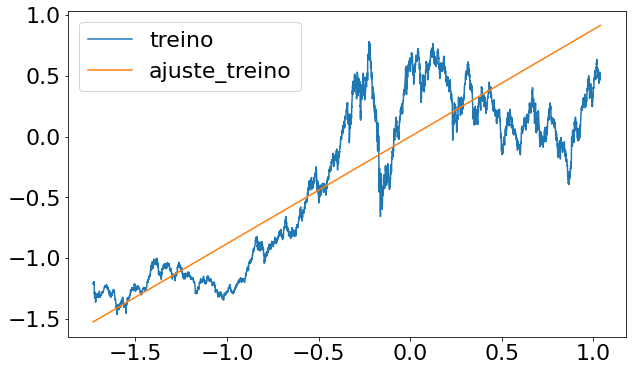

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino');
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino');

In [ ]:
info = {'date' : xtreino, 'close': y_predict[:,0]}

In [ ]:
resultados = pd.DataFrame(data=info)

In [ ]:
resultados

,date,close
0,-1.731030,-1.523951
1,-1.730641,-1.523609
2,-1.730253,-1.523267
3,-1.729864,-1.522925
4,-1.728699,-1.521898
...,...,...
4824,1.035783,0.911875
4825,1.036171,0.912217
4826,1.037337,0.913243
4827,1.037726,0.913585


In [ ]:
resultados_transf = sc.inverse_transform(resultados)

In [ ]:
resultado_transf = pd.DataFrame(resultados_transf)

In [ ]:
resultado_transf.columns = ['Data', 'Close']

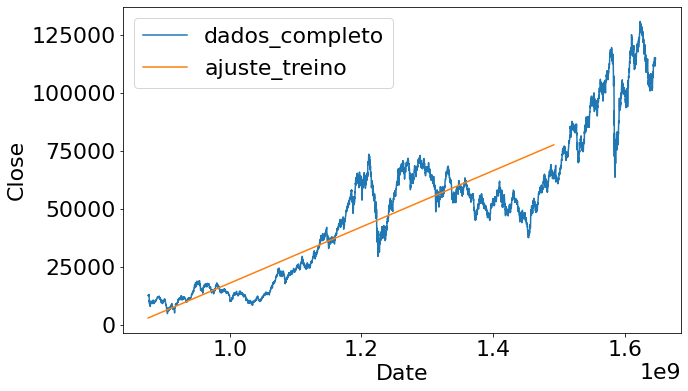

In [ ]:
sns.lineplot(x='Date', y='Close', data=close, label='dados_completo');
sns.lineplot(x='Data', y='Close', data=resultado_transf, label='ajuste_treino');

In [ ]:
y_predict_teste = regressor.predict(xteste)

In [ ]:
d = {'Date': xteste, 'Close':y_predict_teste[:,0]}
teste = pd.DataFrame(data=d)

In [ ]:
transf = sc.inverse_transform(teste)

In [ ]:
transf_teste = pd.DataFrame(transf)


In [ ]:
transf_teste.columns = ['Date', 'Close']

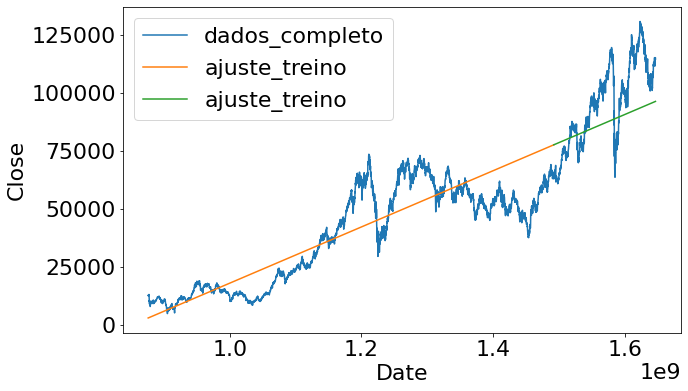

In [ ]:
sns.lineplot(x='Date', y='Close', data=close, label='dados_completo');
sns.lineplot(x='Data', y='Close', data=resultado_transf, label='ajuste_treino');
sns.lineplot(x='Date', y='Close', data=transf_teste, label='ajuste_treino');

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias=False))


In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino,ytreino, epochs= 500)

Epoch 1/500
151/151 [==============================] - 1s 3ms/step - loss: 0.4424
Epoch 2/500
151/151 [==============================] - 1s 4ms/step - loss: 0.1367
Epoch 3/500
151/151 [==============================] - 1s 4ms/step - loss: 0.1364
Epoch 4/500
151/151 [==============================] - 1s 4ms/step - loss: 0.1364
Epoch 5/500
151/151 [==============================] - 0s 3ms/step - loss: 0.1366
Epoch 6/500
151/151 [==============================] - 1s 4ms/step - loss: 0.1368
Epoch 7/500
151/151 [==============================] - 1s 4ms/step - loss: 0.1365
Epoch 8/500
151/151 [==============================] - 0s 3ms/step - loss: 0.1367
Epoch 9/500
151/151 [==============================] - 1s 3ms/step - loss: 0.1365
Epoch 10/500
151/151 [==============================] - 1s 4ms/step - loss: 0.1365
Epoch 11/500
151/151 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 12/500
151/151 [==============================] - 0s 2ms/step - loss: 0.1366
Epoch 13/500


In [ ]:
y_predict = regressor2.predict(xtreino)

In [ ]:
y_predict_teste = regressor2.predict(yteste)

Em verde é a previsão que o código realizou baseada nos dados de azul, que são os que passe pra ele

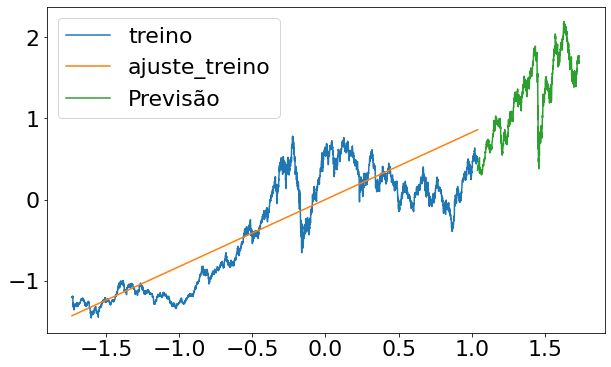

In [ ]:
sns.lineplot(x=xtreino,y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='Previsão')

Aqui é os dados por completo, onde podemos ver que a previsão foi exatamente como o código fez a previsão no gráfico a cima

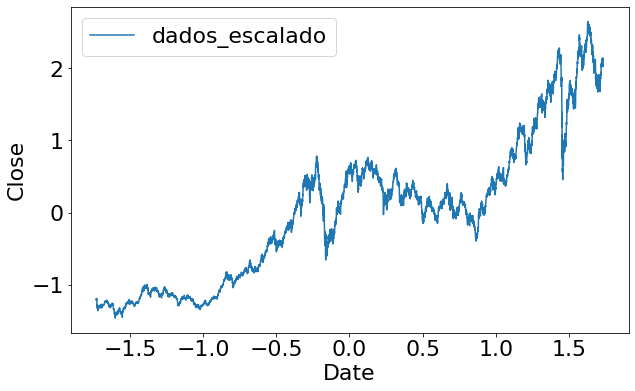

In [ ]:
sns.lineplot(x=x, y=y, label='dados_escalado');
mpl.pyplot.ylabel('Close');
mpl.pyplot.xlabel('Date');